In [1]:
print("Python is ready for my churn project!")

Python is ready for my churn project!


In [2]:
import pandas as pd

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


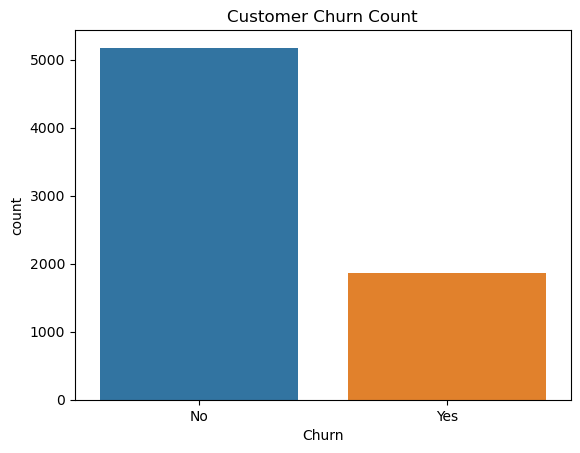

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Count")
plt.show()

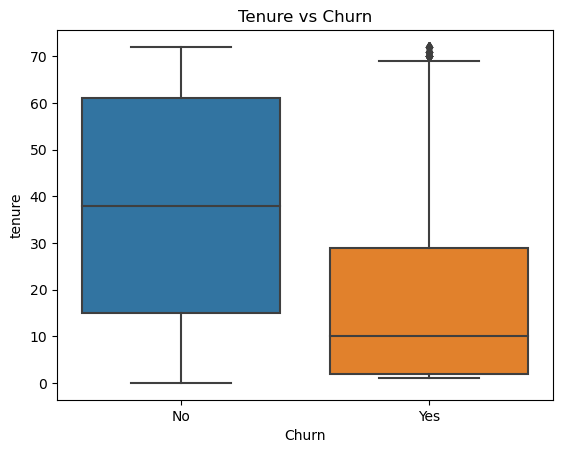

In [8]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.show()

In [9]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [10]:
data = data.drop('customerID', axis=1)

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
from sklearn.metrics import accuracy_score, recall_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, recall

(0.8239886444286728, 0.5951742627345844)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

rf_accuracy, rf_recall

(0.801277501774308, 0.46648793565683644)